# Lecture 2 : Application

*November, 2021 - François HU*

*Master of Science in Artificial Intelligence Systems - EPITA*

*This lecture is available here: https://curiousml.github.io/*

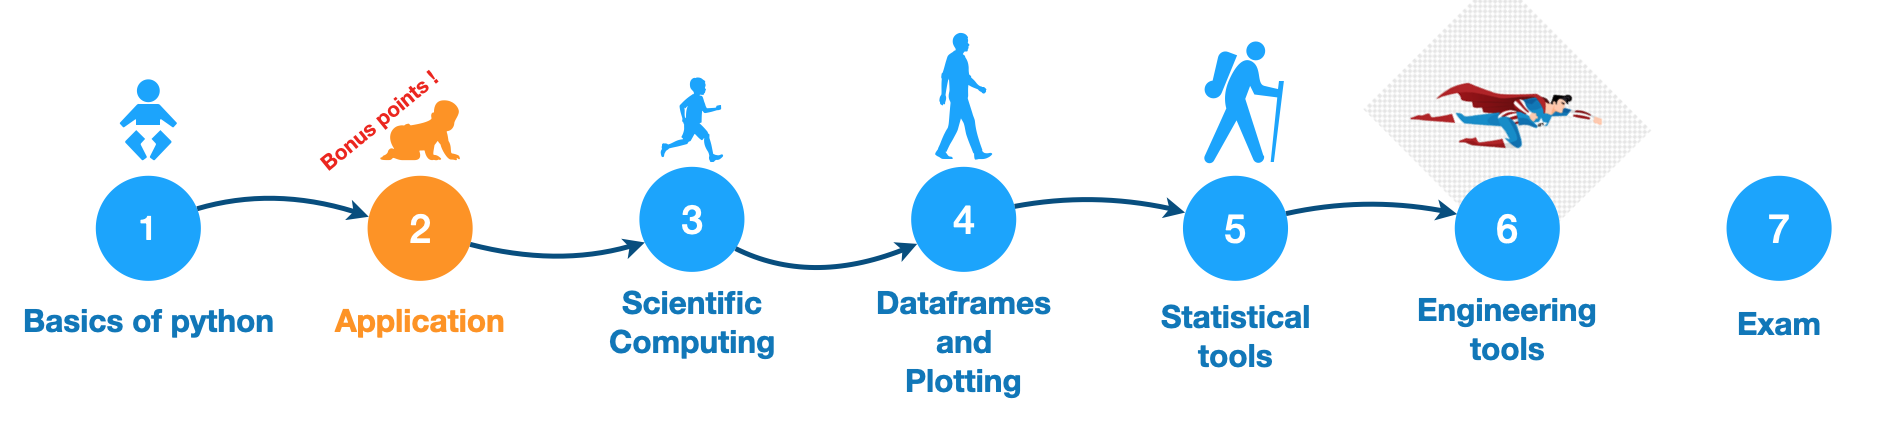

# Table of contents

[Lecture 1: correction and remarks](#C)

[Graded project](#P)

# Correction and feedback <a name="C"></a>

You will find bellow the correction of the exercices of the first lecture.

# Project: sudoku <a name="P"></a>

**Objective** : solve a problem with nested functions. The project this year is a [sudoku game](https://en.wikipedia.org/wiki/Sudoku). Citation wikipedia about the [sudoku](https://en.wikipedia.org/wiki/Sudoku) game
```
the objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (a.k.a. "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.
```
Your 9x9 sudoku will have the following form (0 corresponds to an empty cell)

In [15]:
grid_wiki =   [[5, 3, 0, 0, 7, 0, 0, 0, 0],
               [6, 0, 0, 1, 9, 5, 0, 0, 0],
               [0, 9, 8, 0, 0, 0, 0, 6, 0],
               [8, 0, 0, 0, 6, 0, 0, 0, 3],
               [4, 0, 0, 8, 0, 3, 0, 0, 1],
               [7, 0, 0, 0, 2, 0, 0, 0, 6],
               [0, 6, 0, 0, 0, 0, 2, 8, 0],
               [0, 0, 0, 4, 1, 9, 0, 0, 5],
               [0, 0, 0, 0, 8, 0, 0, 7, 9]]
# easy
grid_wiki_1 = [[5, 0, 3, 1, 0, 0, 0, 9, 0],
               [0, 2, 0, 0, 0, 9, 6, 0, 1],
               [0, 6, 0, 7, 4, 0, 0, 0, 8],
               [0, 4, 1, 3, 0, 2, 0, 5, 0],
               [6, 0, 5, 0, 0, 4, 2, 0, 0],
               [9, 0, 0, 0, 8, 0, 0, 1, 7],
               [0, 9, 8, 5, 6, 0, 0, 4, 0],
               [7, 1, 4, 2, 0, 8, 3, 0, 0],
               [0, 0, 0, 0, 3, 0, 0, 7, 9]]

#has a missplaced digit 
grid_wiki_2 = [[1, 9, 0, 8, 0, 5, 0, 0, 3],
               [4, 3, 5, 1, 6, 0, 0, 9, 7],
               [6, 0, 0, 0, 0, 0, 2, 0, 0],
               [0, 0, 0, 9, 1, 7, 3, 0, 0],
               [8, 0, 0, 2, 0, 6, 0, 4, 0],
               [0, 2, 1, 0, 3, 0, 0, 6, 5],
               [7, 0, 4, 3, 0, 9, 0, 2, 1],
               [0, 5, 9, 0, 0, 0, 4, 0, 8],
               [1, 8, 2, 0, 7, 0, 9, 0, 0]]
#difficult
grid_wiki_3 = [[0, 0, 0, 5, 0, 0, 0, 0, 4],
               [0, 0, 0, 0, 2, 0, 1, 8, 0],
               [0, 0, 5, 0, 7, 0, 0, 0, 2],
               [0, 0, 0, 0, 3, 2, 0, 0, 0],
               [2, 0, 0, 1, 0, 0, 7, 5, 3],
               [0, 0, 0, 7, 4, 0, 0, 0, 0],
               [6, 7, 0, 9, 8, 0, 0, 0, 1],
               [0, 0, 1, 0, 0, 0, 0, 4, 9],
               [0, 4, 9, 0, 0, 3, 0, 0, 0]]
#evil
grid_wiki_4 = [[0, 7, 0, 0, 0, 1, 0, 0, 0],
               [0, 6, 0, 0, 0, 0, 0, 2, 0],
               [2, 0, 1, 0, 5, 0, 0, 0, 3],
               [0, 2, 0, 0, 0, 0, 0, 0, 0],
               [8, 0, 4, 0, 0, 6, 0, 3, 0],
               [0, 0, 0, 9, 0, 0, 0, 0, 5],
               [0, 0, 0, 0, 6, 0, 4, 0, 0],
               [1, 0, 3, 0, 0, 4, 0, 8, 0],
               [0, 0, 7, 0, 0, 0, 0, 0, 0]]

## step 1.

Define a function ``row_unused_digit(grid, valid_digit, i)`` that updates the list ``valid_digit`` so that the function checks for each column ``k`` in row ``i`` of the sudoku ``grid`` whether the digit ``grid[i][k]`` is not zero. ``valid_digit[k] == 0`` means that ``k+1`` is already taken in row ``i``.

In [11]:
def row_unused_digit(grid, valid_digit, row_index):
    """
    Input:
    - grid:           the sudoku
    - valid_digit:    ``valid_digit[k] == 0`` means number *k+1* is already taken on this line
    - row_index:              row index (0 based: the index is between 0 and 8)
    
    Checks the row for already exisiting digits to remove them from possibilities
    """
    for k in range(9):
        if grid[row_index][k] > 0:
            valid_digit[grid[row_index][k] - 1] = 0


## step 2.

Define a function ``column_unused_digit(grid, valid_digit, j)`` that updates the list ``valid_digit`` so that the function checks for each row ``k`` in column ``j`` of the sudoku ``grid`` whether the digit ``grid[k][j]`` is not zero. ``valid_digit[k] == 0`` means that ``k+1`` is already taken in column ``j``.

In [10]:
def column_unused_digit(grid, valid_digit, column_index):
    """
    Input:
    - grid:           the sudoku
    - valid_digit:    ``valid_digit[k] == 0`` means number *k+1* is already taken on this line
    - column_index:              column index (0 based: the index is between 0 and 8)
    
    Checks the column for already exisiting digits to remove them from possibilities
    """
    
    for k in range(9):
        if grid[k][column_index] > 0:
            valid_digit[grid[k][column_index] - 1] = 0

## step 3.

Define a function ``block_unused_digit(grid, valid_digit, i, j)`` that updates the list ``valid_digit`` so that the function checks whether for each digit in the block including row ``i`` and column ``j`` is not zero. ``valid_digit[k] == 0`` means that ``k+1`` is already taken in the block containing ``(i, j)``.

In [9]:
def block_unused_digit(grid, valid_digit, row_index,column_index):
    """
    Input:
    - grid:           the sudoku
    - valid_digit:    ``valid_digit[k] == 0`` means number *k+1* is already taken on this line
    - row_index:              row index (0 based: the index is between 0 and 8)
    - column_index:              column index (0 based: the index is between 0 and 8)
    
    Checks the 3x3 block for already exisiting digits to remove them from possibilities
    
    blocks=[["00",0,0],["01",0,3],["02",0,6],
            ["10",3,0],["11",3,3],["12",3,6],
            ["20",6,0],["21",6,3],["22",6,6]]
    """
    
    # get Back to the zero,zero position of each 3*3 block 
    row_index= row_index//3 *3
    column_index=column_index//3 *3
    
    for k in range(9):
        if grid[row_index+k%3][column_index+ int(k/3)]> 0:
            valid_digit[grid[row_index+k%3][column_index+ int(k/3)]-1]= 0

## step 4.

Define a function ``possible_number(grid, i, j)`` that returns, for a certain position ``grid[i][j]``, the list of possible numbers

In [8]:
def possible_number(grid,row_index,column_index):
    """
    Input:
    - grid:           the sudoku
    - valid_digit:    ``valid_digit[k] == 0`` means number *k+1* is already taken on this line
    - row_index:              row index (0 based: the index is between 0 and 8)
    - column_index:              column index (0 based: the index is between 0 and 8)
    
    Checks the possibilties for the given cell,
    starts by checking it in its block then its row then its column.
    """
    
    possible= [i+1 for i in range(9)]
    
    block_unused_digit(grid,possible,row_index,column_index)

    row_unused_digit(grid,possible,row_index)
    
    column_unused_digit(grid,possible,column_index)

    return possible

## step 5.

Define a function ``best_cell(grid)`` that looks at all the empty cells of the sudoku ``grid`` and chooses the cell with the least number of options. You should have the following results:

```
>>> best_cell(grid_wiki)
(4, 4, [0, 0, 0, 0, 1, 0, 0, 0, 0])
```

In [7]:
def best_cell(grid):
    """
    Input:
    - grid:           the sudoku
    
    searches the best cell in a given sudoku 9X9 , by checking each cell's possibilities
    and return the first empty cell with the least possibilites ( at least 1 possibilty)
    """
    possible= [i+1 for i in range(9)]
    column_index=-1
    row_index=-1
    Max_zeros=0
    bestPro=[]
    for i in range(9):
        for j in range(9):
            possible =possible_number(grid,i,j)
            if possible.count(0)>Max_zeros and possible.count(0)<9 and grid[i][j]==0  :
                Max_zeros=possible.count(0)
                bestPro=possible
                row_index=i
                column_index=j
    return [row_index,column_index,bestPro]

## step 6.

define a function ``solve_sudoku(grid)`` which solves the sudoku. This function returns 0 if the sudoku is impossible to solve (1 otherwise).
it should do the following steps:
- Find the position of a zero element (no number yet) with the smallest number of options;
- If there is at least one possible option, try the first one;
- If not, the Sudoku cannot be solved, go back to last list of multiple options and try the next one.

In [6]:
def solve_sudoku(grid):
    """
    Input:
    - grid:           the sudoku
    
    Each time this Function will look for the best_cell
    With the most possibilities it will only stop when we dont
    have any possible best_cell in other terms no more possiblities
    """
    
    zero_element=best_cell(grid)
    Possiblties = [i for i in zero_element[2] if i> 0]
    number_of_possiblities= len(Possiblties)
    if zero_element[0] ==-1 or zero_element[1] ==-1:
        return 0
    elif number_of_possiblities >=1 :
        grid[zero_element[0]][zero_element[1]]=Possiblties[0]
    solve_sudoku(grid)
    return 1
    



# Extra step ( Hard Level Sudoku).
define a function solve_sudoku(grid) which solves the sudoku. This function returns 0 if the sudoku is impossible to solve (1 otherwise). it should do the following steps:
Find the position of a zero element (no number yet) with the smallest number of options;
If there is at least one possible option, try the first one;
If not, the Sudoku cannot be solved, go back to last list of multiple options and try the next one.

In [17]:
def haszeros(grid):
    return any(0 in sublist for sublist in grid)

def solve_sudoku_hard(grid):    
    elements=best_cell(grid)
    possibilities = [i for i in elements[2] if i> 0]
    notsolved = True
    index=0
    while(notsolved):
        if index>= len(possibilities):
            notsolved=False
        else:
            choice=possibilities[index]
            grid[elements[0]][elements[1]]=choice
            #print(sudoku2str(grid))
            did_work=solve_sudoku_hard(grid)
            if not did_work :
                grid[elements[0]][elements[1]]=0
                index+=1
            else:
                notsolved=False
        if not haszeros(grid) :
            return True   
        
 #evil
grid_wiki_4 = [[0, 7, 0, 0, 0, 1, 0, 0, 0],
               [0, 6, 0, 0, 0, 0, 0, 2, 0],
               [2, 0, 1, 0, 5, 0, 0, 0, 3],
               [0, 2, 0, 0, 0, 0, 0, 0, 0],
               [8, 0, 4, 0, 0, 6, 0, 3, 0],
               [0, 3, 0, 9, 0, 0, 0, 0, 5],
               [0, 0, 0, 0, 6, 0, 4, 0, 0],
               [1, 0, 3, 0, 0, 4, 0, 8, 0],
               [0, 0, 7, 0, 0, 0, 0, 0, 0]]

grid_wiki_5=  [[6, 2, 5, 0, 0, 0, 7, 9, 0],
               [0, 0, 1, 0, 0, 5, 0, 0, 0],
               [0, 8, 0, 0, 0, 1, 6, 2, 5],
               [8, 0, 0, 5, 9, 7, 2, 3, 0],
               [0, 0, 6, 1, 0, 4, 9, 0, 7],
               [9, 5, 7, 3, 0, 6, 8, 0, 4],
               [5, 6, 0, 0, 0, 2, 1, 0, 0],
               [0, 0, 2, 0, 0, 0, 5, 0, 9],
               [1, 0, 8, 6, 0, 9, 0, 4, 0]]
#haszeros(grid_wiki_4)
solve_sudoku_hard(grid_wiki_5)
print(sudoku2str(grid_wiki_5))
    

------------------------------
 | 6 2 5  | 8 4 3  | 7 9 1  | 
 | 7 9 1  | 2 6 5  | 4 8 3  | 
 | 4 8 3  | 9 7 1  | 6 2 5  | 
------------------------------
 | 8 1 4  | 5 9 7  | 2 3 6  | 
 | 2 3 6  | 1 8 4  | 9 5 7  | 
 | 9 5 7  | 3 2 6  | 8 1 4  | 
------------------------------
 | 5 6 9  | 4 3 2  | 1 7 8  | 
 | 3 4 2  | 7 1 8  | 5 6 9  | 
 | 1 7 8  | 6 5 9  | 3 4 2  | 
------------------------------



## step 7.

Define a function ``sudoku2str(grid)`` that converts a sudoku `grid` into a string. Desired result for the sudoku ``grid_wiki``:

```
>>> print(sudoku2str(grid_wiki))
>>>
------------------------------
 | _ _ _  | 3 _ _  | 8 _ _  |
 | _ _ 7  | 9 _ 8  | _ _ 5  |
 | _ _ _  | 2 _ 4  | 1 _ _  |
------------------------------
 | _ 9 _  | 8 1 _  | _ 4 7  |
 | _ 4 _  | _ _ _  | _ _ 6  |
 | _ _ _  | _ _ _  | _ _ _  |
------------------------------
 | _ 1 _  | _ _ 5  | _ 2 _  |
 | 5 3 4  | _ _ _  | _ _ _  |
 | _ _ _  | 7 _ _  | _ _ _  |
------------------------------
```

In [13]:

def sudoku2str(grid):
    """
     Input:
    - grid:           the sudoku
    
    Sketches the sudoku by feeding it into a string
    """
    sudostring="-"*30+"\n"
    row_index=0
    for row in grid:
        iterate=0
        sudostring+= " | "
        for item in row:
            if item==0:
                sudostring+="_ "
            else:
                sudostring= sudostring+ str(item)+ " " 
            iterate+=1
            if iterate in [3,6,9]:
                sudostring+=" | "      
        sudostring+='\n'
        row_index+=1
        if row_index in [3,6,9]:
            sudostring+="-"*30+"\n" 
    return sudostring

## step 8.

Solve the soduku ``grid_wiki`` and print the solution grid. You should have th following results

```
>>> solve_sudoku(grid_wiki)
>>> print(sudoku2str(grid_wiki))
------------------------------
 | 5 3 4  | 6 7 8  | 9 1 2  |
 | 6 7 2  | 1 9 5  | 3 4 8  |
 | 1 9 8  | 3 4 2  | 5 6 7  |
------------------------------
 | 8 5 9  | 7 6 1  | 4 2 3  |
 | 4 2 6  | 8 5 3  | 7 9 1  |
 | 7 1 3  | 9 2 4  | 8 5 6  |
------------------------------
 | 9 6 1  | 5 3 7  | 2 8 4  |
 | 2 8 7  | 4 1 9  | 6 3 5  |
 | 3 4 5  | 2 8 6  | 1 7 9  |
------------------------------
```

In [18]:
# orginal exercise Sudoku

from timeit import default_timer as timer
start = timer()

solve_sudoku_hard(grid_wiki)
print(sudoku2str(grid_wiki))

end = timer()
print(end - start) # Time in seconds

------------------------------
 | 5 3 4  | 6 7 8  | 9 1 2  | 
 | 6 7 2  | 1 9 5  | 3 4 8  | 
 | 1 9 8  | 3 4 2  | 5 6 7  | 
------------------------------
 | 8 5 9  | 7 6 1  | 4 2 3  | 
 | 4 2 6  | 8 5 3  | 7 9 1  | 
 | 7 1 3  | 9 2 4  | 8 5 6  | 
------------------------------
 | 9 6 1  | 5 3 7  | 2 8 4  | 
 | 2 8 7  | 4 1 9  | 6 3 5  | 
 | 3 4 5  | 2 8 6  | 1 7 9  | 
------------------------------

0.042521624999992014


In [19]:
# easy Level
from timeit import default_timer as timer
start = timer()

solve_sudoku_hard(grid_wiki_1)
print(sudoku2str(grid_wiki_1))

end = timer()
print(end - start) # Time in seconds

------------------------------
 | 5 8 3  | 1 2 6  | 7 9 4  | 
 | 4 2 7  | 8 5 9  | 6 3 1  | 
 | 1 6 9  | 7 4 3  | 5 2 8  | 
------------------------------
 | 8 4 1  | 3 7 2  | 9 5 6  | 
 | 6 7 5  | 9 1 4  | 2 8 3  | 
 | 9 3 2  | 6 8 5  | 4 1 7  | 
------------------------------
 | 3 9 8  | 5 6 7  | 1 4 2  | 
 | 7 1 4  | 2 9 8  | 3 6 5  | 
 | 2 5 6  | 4 3 1  | 8 7 9  | 
------------------------------

0.003310624999997458


In [20]:
# Sudoku with wrong digit placement
from timeit import default_timer as timer
start = timer()

solve_sudoku_hard(grid_wiki_2)
print(sudoku2str(grid_wiki_2))

end = timer()
print(end - start) # Time in seconds

------------------------------
 | 1 9 _  | 8 _ 5  | _ _ 3  | 
 | 4 3 5  | 1 6 _  | _ 9 7  | 
 | 6 _ _  | _ _ _  | 2 _ _  | 
------------------------------
 | _ _ _  | 9 1 7  | 3 _ _  | 
 | 8 _ _  | 2 _ 6  | _ 4 _  | 
 | _ 2 1  | _ 3 _  | _ 6 5  | 
------------------------------
 | 7 _ 4  | 3 _ 9  | _ 2 1  | 
 | _ 5 9  | _ _ _  | 4 _ 8  | 
 | 1 8 2  | _ 7 _  | 9 _ _  | 
------------------------------

0.03940095800000165


In [21]:
#Hard Level
from timeit import default_timer as timer
start = timer()

solve_sudoku_hard(grid_wiki_3)
print(sudoku2str(grid_wiki_3))

end = timer()
print(end - start) # Time in seconds

------------------------------
 | 9 2 8  | 5 6 1  | 3 7 4  | 
 | 7 6 3  | 4 2 9  | 1 8 5  | 
 | 4 1 5  | 3 7 8  | 9 6 2  | 
------------------------------
 | 1 5 7  | 8 3 2  | 4 9 6  | 
 | 2 8 4  | 1 9 6  | 7 5 3  | 
 | 3 9 6  | 7 4 5  | 2 1 8  | 
------------------------------
 | 6 7 2  | 9 8 4  | 5 3 1  | 
 | 8 3 1  | 2 5 7  | 6 4 9  | 
 | 5 4 9  | 6 1 3  | 8 2 7  | 
------------------------------

0.7628357499999936


In [1]:
#Evil Level
from timeit import default_timer as timer
start = timer()

solve_sudoku_hard(grid_wiki_4)
print(sudoku2str(grid_wiki_4))

end = timer()
print(end - start) # Time in seconds

NameError: name 'solve_sudoku_hard' is not defined